In [2]:
import numpy as np
import matplotlib.pyplot as plt
import msmrd2.tools.analysis as analysisTools
import timeit
from matplotlib import rc
import matplotlib as mpl
import matplotlib.colors as colors
rc('text', usetex=True)

In [3]:
# Main parameters
numparticles = 2
boxsize = 6 #10 #8 #6 #5 
D = 1.0
Drot = 1.0
lagtime = 150 #150 #75 #75 #75
rootDirectory = '../../data/patchyProtein/first_passage_times/'
#rootDirectory = '../../data/testPatchyProtein/first_passage_times/'

In [4]:
# Color definitions
c1 = '#ff3300' #'xkcd:bright orange' # 'darkorange' #'C1' # '#ff3300' # for benchmark
c2 = '#0099ff' #'royalblue' #'royalblue' # 'C0' # '#0099ff' # for MSM/RD
c2alt = 'royalblue' #'royalblue' #'royalblue' # 'C0' # '#0099ff' # for MSM/RD
# Alpha transparency definition
a1 = 0.2 #0.2
a2 = 0.7 #0.9 #0.7

## Load unbound to bound FPT data (bechmark and MSMRD)

In [34]:
# Load benchmark FPT data computed by script
numTrajs = 5000
filename1 = rootDirectory + 'patchyProteinFPTs_2bound_trajs' + str(numTrajs) + '_boxsize' + str(boxsize) + '.xyz'
#filename1 = rootDirectory + 'testNew7_ALL_PatchyProteinFPTs_2bound_trajs' + str(numTrajs) + '_boxsize' + str(boxsize) + '.xyz'
fpts = []
with open(filename1) as file:
    for line in file:
        state, time = line.split(" ")
        time = float(time)
        fpts.append(time)
            
# Normalize weights
weights = np.ones_like(fpts)/float(len(fpts))
max(fpts)

237.73540000676846

In [35]:
# Load FPT data obtained with MSMRD integrator
numTrajs = 5000
filename = rootDirectory + 'MSMRDpatchyProteinFPTs_2bound_trajs' + \
str(numTrajs) + '_lagt' + str(lagtime) +  '_boxsize' + str(boxsize) + '.xyz'
#filename = rootDirectory + 'testNew7_ALL_MSMRDpatchyProteinFPTs_2bound_trajs' + \
#str(numTrajs) + '_lagt' + str(lagtime) +  '_boxsize' + str(boxsize) + '.xyz'
MSMRDfpts = []
with open(filename) as file:
    for line in file:
        state, time = line.split(" ")
        time = float(time)
        MSMRDfpts.append(time)
            
# Normalize weights
#MSMRDfpts = [x for x in MSMRDfpts if x <= max(fpts)]
weightsMSMRD = np.ones_like(MSMRDfpts)/float(len(MSMRDfpts))
max(MSMRDfpts)

277.0574000020889

### Calculation of FPTs and comparisons plots

In [36]:
# Compuate mean and standard deviation of bootstrapped samples of benchmark
calculateRates = True
numBootsrapSamples = 2000
mfpt, fptstd = analysisTools.bootstrapping(fpts, numBootsrapSamples)
print("Raw MFPT: ", np.array(fpts).mean())
print("Bootstrapping mean and std: ", mfpt, fptstd)
# Compuate mean and standard deviation of bootstrapped samples of MSMRD simulation
MSMRDmfpt, MSMRDfptstd = analysisTools.bootstrapping(MSMRDfpts, numBootsrapSamples)
print("Raw MSMRD MFPT: ",np.array(MSMRDfpts).mean())
print("MSMRD bootstrapping mean and std: ", MSMRDmfpt, MSMRDfptstd)
if calculateRates:
    mkon = 1.0/mfpt
    MSMRDmkon = 1.0/MSMRDmfpt
    konstd = fptstd/(mfpt*mfpt)
    MSMRDkonstd = MSMRDfptstd/(MSMRDmfpt*MSMRDmfpt)
    konError = np.abs(mkon - MSMRDmkon)
    konRelError = konError/mkon
    print("On rates:")
    print("Bootstrapping mean and std:", mkon, konstd)
    print("Bootstrapping MSMRD mean and std (A):", MSMRDmkon, MSMRDkonstd)
    print("Error and relative error:", konError, konRelError)

Raw MFPT:  27.38824120023474
Bootstrapping mean and std:  27.39334938087489 0.38520888093290023
Raw MSMRD MFPT:  31.55064898033305
MSMRD bootstrapping mean and std:  31.549314693952983 0.43987198850236675
On rates:
Bootstrapping mean and std: 0.036505211031191614 0.0005133410775741937
Bootstrapping MSMRD mean and std (A): 0.0316964095639031 0.0004419228385310001
Error and relative error: 0.004808801467288515 0.1317291786966981


(0, 300)

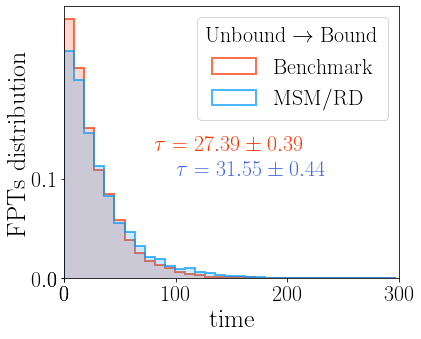

In [37]:
# PLOT FOR PAPER #
# Configure figure
fig, ax1 = plt.subplots(nrows=1, figsize=(6,5))
fig.subplots_adjust(hspace=0)
fsize = 22
plt.rcParams['xtick.labelsize']=fsize
plt.rcParams['ytick.labelsize']=fsize
# Set outer common axes titles
ax0 = fig.add_subplot(111, frameon=False)
ax0.set_xlabel(r'$\mathrm{time}$', fontsize=fsize + 4)
ax0.set_ylabel(r'$\mathrm{FPTs \ distribution}$', labelpad=17, fontsize=fsize + 4)
ax0.set_xticks([0])
ax0.set_yticks([0])
hbins = range(0, 300,9)
#hbins = range(0, 500,15)
#hbins = range(0, 2000,60)
#hbins = np.arange(0, 10,0.5)


# Plot A to unbound histogram
ax1.hist(fpts, bins = hbins, alpha=a1, color=c1, weights = weights );
ax1.hist(fpts, bins = hbins, alpha=a2, edgecolor=c1, lw=2, histtype='step', 
         facecolor = 'None', weights = weights, label =r'$\mathrm{Benchmark}$');
ax1.hist(MSMRDfpts, bins = hbins, alpha=a1, color=c2, weights = weightsMSMRD);
ax1.hist(MSMRDfpts, bins = hbins, alpha=a2, edgecolor=c2, lw=2, histtype='step', 
         weights = weightsMSMRD, label =r'$\mathrm{MSM/RD}$');
ax1.legend(fontsize=fsize, title=r'$\mathrm{Unbound} \rightarrow \mathrm{Bound}$', title_fontsize = fsize, fancybox=True)
ax1.text(80, 0.130, r'$\tau = {:.2f} \pm {:.2f}$'.format(mfpt, fptstd), fontsize=fsize, color=c1)
ax1.text(100, 0.105, r'$\tau = {:.2f} \pm {:.2f}$'.format(MSMRDmfpt, MSMRDfptstd), fontsize=fsize, color=c2alt)
ax1.set_yticks(np.arange(0, 0.18, step=0.1));
ax1.set_xlim([0,300])
#ax1.set_xlim([0,2000])
#ax1.set_xlim([0,10])
#ax1.set_ylim([0,0.18])

#plt.savefig('toBound_patchyProtein_FPTs.pdf', bbox_inches='tight')

## Load bound to unbound FPT data (bechmark and MSMRD)

In [9]:
# Load benchmark FPT data computed by script
numTrajs = 5000
filename = rootDirectory + 'patchyProteinFPTs_2unbound_trajs' + str(numTrajs) + '_boxsize' + str(boxsize) + '.xyz'
fpts2unbound = []
with open(filename) as file:
    
    for line in file:
        state, dummy1, dummy2, dummy3, dummy4, dummy5, time = line.split(" ")
        time = float(time)
        fpts2unbound.append(time)
        
# Normalizing weights
weights2 = np.ones_like(fpts2unbound)/float(len(fpts2unbound))

In [10]:
# Load FPT data obtained with MSMRD integrator
numTrajs = 5000
filename = rootDirectory + 'MSMRDpatchyProteinFPTs_2unbound_trajs' + \
str(numTrajs) + '_lagt' + str(lagtime) +  '_boxsize' + str(boxsize) + '.xyz'
MSMRDfpts2unbound = []
with open(filename) as file:
    for line in file:
        state, dummy1, dummy2, dummy3, dummy4, dummy5, time = line.split(" ")
        time = float(time)
        MSMRDfpts2unbound.append(time)
        
# Normalizing weights
weightsMSMRD2 = np.ones_like(MSMRDfpts2unbound)/float(len(MSMRDfpts2unbound))

### Calculation of FPTs and comparisons plots

In [11]:
# Compuate mean and standard deviation of bootstrapped samples of benchmark
numBootsrapSamples = 2000
mfpt2unbound, fpt2unboundstd = analysisTools.bootstrapping(fpts2unbound, numBootsrapSamples)
print("Raw MFPT: ", np.array(fpts2unbound).mean())
print("Bootstrapping mean and std: ", mfpt2unbound, fpt2unboundstd)
MSMRDmfpt2unbound, MSMRDfpt2unboundstd = analysisTools.bootstrapping(MSMRDfpts2unbound, numBootsrapSamples)
print("Raw MSMRD MFPT: ",np.array(MSMRDfpts2unbound).mean())
print("MSMRD bootstrapping mean and std: ", MSMRDmfpt2unbound, MSMRDfpt2unboundstd)
# Calculate rates
mkoff = 1.0/mfpt2unbound
mkoffMSMRD = 1.0/MSMRDmfpt2unbound
koffstd = fpt2unboundstd/(mfpt2unbound*mfpt2unbound)
koffstdMSMRD = MSMRDfpt2unboundstd/(MSMRDmfpt2unbound*MSMRDmfpt2unbound)
koffError = np.abs(mkoff - mkoffMSMRD)
koffRelError = koffError/mkoff
print("Off rates:")
print("Bootstrapping mean and std:", mkoff, koffstd)
print("Bootstrapping MSMRD mean and std:", mkoffMSMRD, koffstdMSMRD)
print("Error and relative error:", koffError, koffRelError)

Raw MFPT:  1.7498687200003784
Bootstrapping mean and std:  1.7493206968503778 0.017471652631483505
Raw MSMRD MFPT:  1.6345163400003415
MSMRD bootstrapping mean and std:  1.6344430776903414 0.01670275159519922
Off rates:
Bootstrapping mean and std: 0.5716504708373273 0.005709461090282885
Bootstrapping MSMRD mean and std: 0.6118291995907967 0.006252424008485881
Error and relative error: 0.040178728753469395 0.0702854817815814


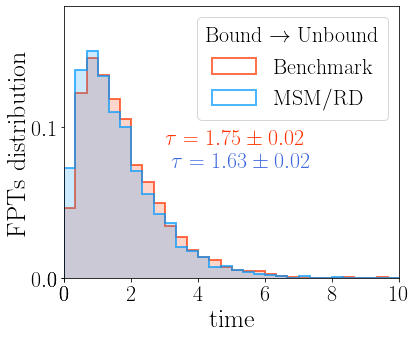

In [12]:
# PLOT FOR PAPER #
# Configure figure
fig, ax1 = plt.subplots(nrows=1, figsize=(6,5))
fig.subplots_adjust(hspace=0)
fsize = 22
plt.rcParams['xtick.labelsize']=fsize
plt.rcParams['ytick.labelsize']=fsize
#hbins = np.arange(0, 15, 0.5)
hbins = np.arange(0, 10, 0.33333333)
#hbins = np.arange(0, 20, 0.66666666)

# Set outer common axes titles
ax0 = fig.add_subplot(111, frameon=False)
ax0.set_xlabel(r'$\mathrm{time}$', fontsize=fsize + 4)
ax0.set_ylabel(r'$\mathrm{FPTs \ distribution}$', labelpad=17, fontsize=fsize + 4)
ax0.set_xticks([0])
ax0.set_yticks([0])

# Plot A to unbound histogram
ax1.hist(fpts2unbound, bins = hbins, alpha=a1, color=c1, weights = weights2);
ax1.hist(fpts2unbound, bins = hbins, alpha=a2, edgecolor=c1, lw=2, histtype='step',
         facecolor='None', weights = weights2, label = r'$\mathrm{Benchmark}$');
ax1.hist(MSMRDfpts2unbound, bins = hbins, alpha=a1, color=c2, weights = weightsMSMRD2);
ax1.hist(MSMRDfpts2unbound, bins = hbins, alpha=a2, edgecolor=c2, lw=2, histtype='step',
         facecolor='None', weights = weightsMSMRD2, label =r'$\mathrm{MSM/RD}$');
ax1.legend(fontsize=fsize, title=r'$ \mathrm{Bound} \rightarrow \mathrm{Unbound}$', title_fontsize = fsize, fancybox=True)
ax1.text(3.0, 0.09, r'$\tau = {:.2f} \pm {:.2f}$'.format(mfpt2unbound, fpt2unboundstd), fontsize=fsize, color=c1)
ax1.text(3.2, 0.075, r'$\tau = {:.2f} \pm {:.2f}$'.format(MSMRDmfpt2unbound, MSMRDfpt2unboundstd), 
         fontsize=fsize, color=c2alt)
#ax1.set_xlim([0,15])
#ax1.set_ylim([0,0.2])
ax1.set_xlim([0,10])
ax1.set_ylim([0,0.18])
ax1.set_yticks(np.arange(0, 0.2, step=0.1));


#plt.savefig('toUnbound_patchyProtein_FPTs.pdf', bbox_inches='tight')

## Load bound to bound FPT data (bechmark and MSMRD)

In [5]:
# Load benchmark FPT data computed by script
numTrajs = 1000
boundStates = [1,2,3,4,5,6]
fptsB2B = np.zeros([len(boundStates),len(boundStates),numTrajs])
weightsB2B = np.zeros([len(boundStates),len(boundStates),numTrajs])
for i in boundStates:
    for j in boundStates:
        if i != j:
            filenameB2B = rootDirectory + 'patchyProteinFPTs_' + str(i) + 'to' + str(j) \
            + '_trajs' + str(numTrajs) + '_boxsize' + str(boxsize) + '.xyz'
            with open(filenameB2B) as file:
                k=0
                for line in file:
                    initState, endState, time = line.split(" ")
                    time = float(time)
                    fptsB2B[i-1,j-1,k] = time
                    k += 1

            # Normalizing weights
            weightsB2B[i-1,j-1] = np.ones_like(fptsB2B[i-1,j-1])/float(len(fptsB2B[i-1,j-1]))

In [6]:
# Load FPT data obtained with MSMRD integrator
# Load benchmark FPT data computed by script
MSMRDfptsB2B = np.zeros([len(boundStates),len(boundStates),numTrajs])
MSMRDweightsB2B = np.zeros([len(boundStates),len(boundStates),numTrajs])
for i in boundStates:
    for j in boundStates:
        if i != j:
            filenameB2B = rootDirectory + 'MSMRDpatchyProteinFPTs_' + str(i) + 'to' + str(j) \
            + '_trajs' + str(numTrajs) + '_lagt' + str(lagtime) + '_boxsize' + str(boxsize) + '.xyz'
            with open(filenameB2B) as file:
                k=0
                for line in file:
                    initState, endState, time = line.split(" ")
                    time = float(time)
                    MSMRDfptsB2B[i-1,j-1,k] = time
                    k += 1

            # Normalizing weights
            MSMRDweightsB2B[i-1,j-1] = np.ones_like(MSMRDfptsB2B[i-1,j-1])/float(len(MSMRDfptsB2B[i-1,j-1]))

### Calculation of FPTs and comparisons plots

In [7]:
# Compuate mean and standard deviation of bootstrapped samples of benchmark
numBootsrapSamples = 2000
mfptsB2B = np.zeros([len(boundStates),len(boundStates)])
MSMRDmfptsB2B = np.zeros([len(boundStates),len(boundStates)])
fptB2Bstd = np.zeros([len(boundStates),len(boundStates)])
MSMRDfptB2Bstd = np.zeros([len(boundStates),len(boundStates)])
mfptsB2BDiff = np.zeros([len(boundStates),len(boundStates)])
mfptsB2BRelDiff = np.zeros([len(boundStates),len(boundStates)])
print("Begins boostrapping:") 
print("Transition     MFPT       stddev     MSMRD-MFPT  MSMRD-stddev    Error       Relative Error")
for i in boundStates:
    for j in boundStates:
        if i != j:
            mfptsB2B[i-1,j-1], fptB2Bstd[i-1,j-1] = analysisTools.bootstrapping(fptsB2B[i-1,j-1], numBootsrapSamples)
            MSMRDmfptsB2B[i-1,j-1], MSMRDfptB2Bstd[i-1,j-1] = analysisTools.bootstrapping(MSMRDfptsB2B[i-1,j-1], numBootsrapSamples)
            mfptsB2BDiff[i-1,j-1] = np.abs(mfptsB2B[i-1,j-1] - MSMRDmfptsB2B[i-1,j-1])
            mfptsB2BRelDiff[i-1,j-1] = mfptsB2BDiff[i-1,j-1]/mfptsB2B[i-1,j-1]
            print(str(i) + " to " + str(j) + ":    {:10.4f} {:10.2f} {:10.4f} {:10.2f} {:16.4f} {:12.4f}"
                  .format(mfptsB2B[i-1,j-1], fptB2Bstd[i-1,j-1], MSMRDmfptsB2B[i-1,j-1], 
                          MSMRDfptB2Bstd[i-1,j-1], mfptsB2BDiff[i-1,j-1], mfptsB2BRelDiff[i-1,j-1]))

Begins boostrapping:
Transition     MFPT       stddev     MSMRD-MFPT  MSMRD-stddev    Error       Relative Error
1 to 2:      223.6915       7.47   244.5784       7.90          20.8868       0.0934
1 to 3:      231.1815       7.40   253.5180       8.55          22.3364       0.0966
1 to 4:       72.2434       2.30    70.1750       2.32           2.0684       0.0286
1 to 5:      221.3809       7.66   260.2999       7.98          38.9190       0.1758
1 to 6:      249.9376       8.21   248.0433       8.09           1.8943       0.0076
2 to 1:      166.6994       5.59   167.1260       5.56           0.4266       0.0026
2 to 3:      238.9553       7.88   245.8851       8.20           6.9298       0.0290
2 to 4:       64.8861       2.18    63.5172       2.22           1.3689       0.0211
2 to 5:      240.5495       8.02   251.2301       8.02          10.6806       0.0444
2 to 6:      230.9560       7.33   224.5025       7.56           6.4535       0.0279
3 to 1:      169.0084       4.92   17

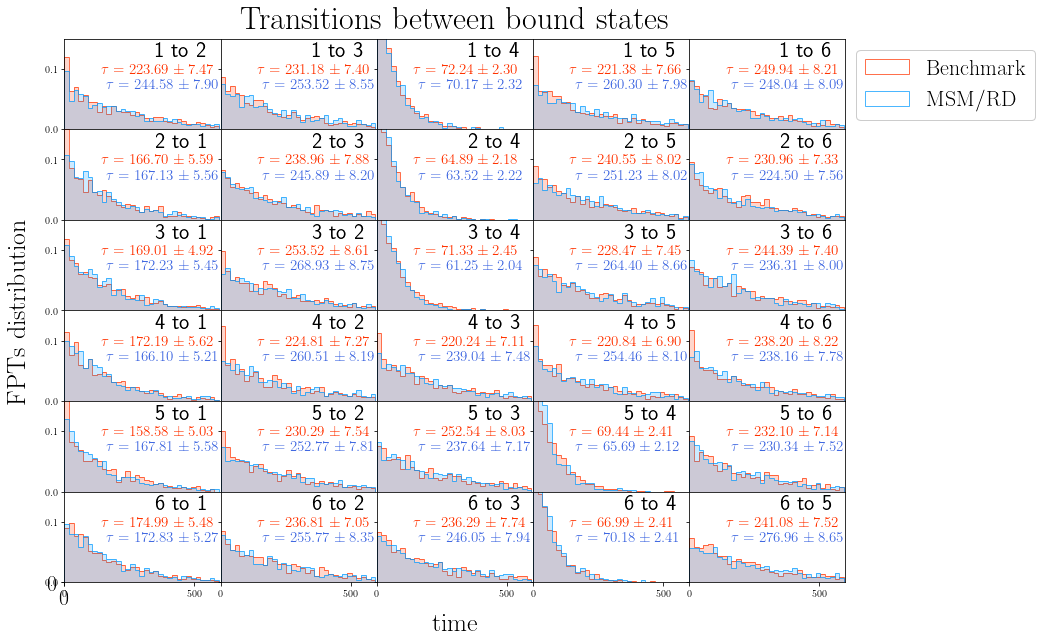

In [8]:
# Grid plot for histograms
fig, ax = plt.subplots(nrows=6, ncols=5, sharex=True, sharey=True, figsize=(14,10))
fig.subplots_adjust(hspace=0, wspace=0)
fsize = 22
fsize2 = 15
plt.rcParams['xtick.labelsize']=fsize
plt.rcParams['ytick.labelsize']=fsize
#hbins = np.arange(0, 500, 15)
hbins = np.arange(0, 600, 18)
# Set outer common axes titles
ax0 = fig.add_subplot(111, frameon=False)
ax0.set_xlabel(r'$\mathrm{time}$', fontsize=fsize + 4)
ax0.set_ylabel(r'$\mathrm{FPTs \ distribution}$', labelpad=17, fontsize=fsize + 4)
ax0.set_title(r'$\mathrm{Transitions \ between \ bound \ states}$', pad = 10, fontsize=fsize + 10)
ax0.set_xticks([0])
ax0.set_yticks([0])
# Loop over plotting grid
for i in range(6):
    for j in range(5):
        if j < i:
            jj = j
        else:
            jj = j+1
        ax[i,j].hist(fptsB2B[i,jj], bins = hbins, alpha=a1, color=c1, weights = weightsB2B[i,jj]);
        ax[i,j].hist(fptsB2B[i,jj], bins = hbins, alpha=a2, edgecolor=c1, lw=1, histtype='step',
         facecolor='None', weights = weightsB2B[i,jj], label = r'$\mathrm{Benchmark}$');
        ax[i,j].hist(MSMRDfptsB2B[i,jj], bins = hbins, alpha=a1, color=c2, weights = MSMRDweightsB2B[i,jj]);
        ax[i,j].hist(MSMRDfptsB2B[i,jj], bins = hbins, alpha=a2, edgecolor=c2, lw=1, histtype='step',
         facecolor='None', weights = MSMRDweightsB2B[i,jj], label =r'$\mathrm{MSM/RD}$');
        ax[i,j].text(350,0.12, r'{:d} to {:d}'.format(i+1, jj+1), fontsize=fsize, family="serif")
        ax[i,j].text(140,0.095, r'$\tau = {:.2f} \pm {:.2f}$'.format(mfptsB2B[i,jj] , fptB2Bstd[i,jj]), 
                     fontsize=fsize2, color=c1)
        ax[i,j].text(160,0.07, r'$\tau = {:.2f} \pm {:.2f}$'.format(MSMRDmfptsB2B[i,jj], MSMRDfptB2Bstd[i,jj]), 
                     fontsize=fsize2, color=c2alt)
        # Add legend
        if i == 0 and j == 4:
            ax[i,j].legend(fontsize=fsize, fancybox=True, framealpha=1.0, 
                           bbox_to_anchor=(1.0, 1.0)) #1.4,1.8
        # Set plotlimits
        ax[i,j].set_xlim([0,600])
        #ax[i,j].set_ylim([0,0.23])
        ax[i,j].set_ylim([0,0.15])
        #ax[i,j].set_xticks(np.arange(0, 500, step=300));
        #ax[i,j].set_yticks(np.arange(-0.1, 0.3, step=0.2));
        
#plt.savefig('bound2bound__patchyProtein_FPTs.pdf', bbox_inches='tight')

## MFPT comparison table

In [9]:
# Calculate MFPT difference between benchmark and MSM/RD for all transitions between bound states
MFPTdiff = mfptsB2BDiff
MFPTdiffRel = 0.0 * MFPTdiff
MFPTDiffStd = 0.0 * MFPTdiff 
MFPTDiffRelStd = 0.0 * MFPTdiff 
for i in boundStates:
    for j in boundStates:
        if mfptsB2B[i-1,j-1] != 0:
            MFPTdiffRel[i-1,j-1] = MFPTdiff[i-1,j-1]/mfptsB2B[i-1,j-1]
        MFPTDiffStd[i-1,j-1] = np.sqrt( fptB2Bstd[i-1,j-1]**2 + MSMRDfptB2Bstd[i-1,j-1]**2 )
        if fptB2Bstd[i-1,j-1] != 0:
            MFPTDiffRelStd[i-1,j-1] = MFPTDiffStd[i-1,j-1]/mfptsB2B[i-1,j-1]

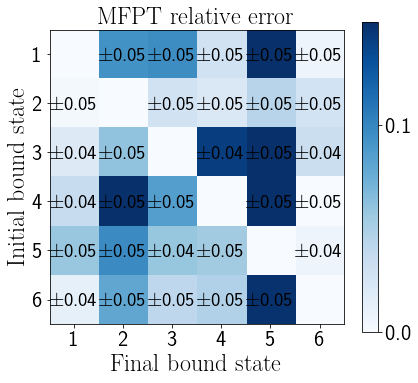

In [10]:
# Plot square grid with errors
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(MFPTdiffRel, cmap='Blues')
im.set_clim(0.0,0.15)
# Set labels
ax.set_title(r"$\mathrm{MFPT \ relative \ error}$", fontsize = fsize + 2)
ax.set_ylabel(r"$\mathrm{Initial \ bound \ state}$", fontsize = fsize + 2)
ax.set_xlabel(r'$\mathrm{Final \ bound \ state}$', fontsize = fsize + 2)
# We want to show all ticks...
ax.set_xticks(np.arange(len(boundStates)))
ax.set_yticks(np.arange(len(boundStates)))
# ... and label them with the respective list entries
ax.set_xticklabels(boundStates)
ax.set_yticklabels(boundStates)
# Loop over data dimensions and create text annotations.
for i in range(len(boundStates)):
    for j in range(len(boundStates)):
        if i != j:
            #text = ax.text(j, i, '{:.2f}'.format(MFPTdiffRel[i, j]), ha="center", 
            #               va="center", color="w", fontsize =fsize)
            text = ax.text(j, i, r'$\pm${:}'.format(round(MFPTDiffRelStd[i, j],2)), ha="center", 
                           va="center", color="k", fontsize =fsize-2)
# Set colorbar
cbar = fig.colorbar(im, ax=ax, shrink = 0.8)
cbar.set_ticks([0.0,0.1])
cbar.set_ticklabels([0.0,0.1])
# Show plot
fig.tight_layout()
#plt.show()
#plt.savefig('patchyProtein_MFPTs_relError.pdf', bbox_inches='tight')

In [11]:
np.mean(mfptsB2BRelDiff)

0.05491948375572298

### Rates comaprison

In [12]:
ratesB2B = np.zeros([len(boundStates),len(boundStates)])
ratesB2Bstd = np.zeros([len(boundStates),len(boundStates)])
MSMRDratesB2B = np.zeros([len(boundStates),len(boundStates)])
MSMRDratesB2Bstd = np.zeros([len(boundStates),len(boundStates)])
ratesB2BDiff = np.zeros([len(boundStates),len(boundStates)])
ratesB2BRelDiff = np.zeros([len(boundStates),len(boundStates)])
print("Transition     rate       stddev     MSMRD-rate  MSMRD-stddev    Error       Relative Error")
for i in boundStates:
    for j in boundStates:
        if i != j:
            ratesB2B[i-1,j-1] = 1.0/mfptsB2B[i-1,j-1]
            ratesB2Bstd[i-1,j-1] = ratesB2B[i-1,j-1]*fptB2Bstd[i-1,j-1]/mfptsB2B[i-1,j-1]
            MSMRDratesB2B[i-1,j-1] = 1.0/MSMRDmfptsB2B[i-1,j-1]
            MSMRDratesB2Bstd[i-1,j-1] = MSMRDratesB2B[i-1,j-1]*MSMRDfptB2Bstd[i-1,j-1]/MSMRDmfptsB2B[i-1,j-1]
            ratesB2BDiff[i-1,j-1] = np.abs(ratesB2B[i-1,j-1] - MSMRDratesB2B[i-1,j-1])
            ratesB2BRelDiff[i-1,j-1] = ratesB2BDiff[i-1,j-1]/ratesB2B[i-1,j-1]
            print(str(i) + " to " + str(j) + ":    {:10.4f} {:10.5f} {:10.4f} {:12.5f} {:16.4f} {:12.4f}"
                  .format(ratesB2B[i-1,j-1], ratesB2Bstd[i-1,j-1], MSMRDratesB2B[i-1,j-1], 
                          MSMRDratesB2Bstd[i-1,j-1], ratesB2BDiff[i-1,j-1], ratesB2BRelDiff[i-1,j-1]))

Transition     rate       stddev     MSMRD-rate  MSMRD-stddev    Error       Relative Error
1 to 2:        0.0045    0.00015     0.0041      0.00013           0.0004       0.0854
1 to 3:        0.0043    0.00014     0.0039      0.00013           0.0004       0.0881
1 to 4:        0.0138    0.00044     0.0143      0.00047           0.0004       0.0295
1 to 5:        0.0045    0.00016     0.0038      0.00012           0.0007       0.1495
1 to 6:        0.0040    0.00013     0.0040      0.00013           0.0000       0.0076
2 to 1:        0.0060    0.00020     0.0060      0.00020           0.0000       0.0026
2 to 3:        0.0042    0.00014     0.0041      0.00014           0.0001       0.0282
2 to 4:        0.0154    0.00052     0.0157      0.00055           0.0003       0.0216
2 to 5:        0.0042    0.00014     0.0040      0.00013           0.0002       0.0425
2 to 6:        0.0043    0.00014     0.0045      0.00015           0.0001       0.0287
3 to 1:        0.0059    0.00017     0

## Rates comparison table

In [13]:
# Calculate MFPT difference between benchmark and MSM/RD for all transitions between bound states
ratesDiffStd = np.zeros([len(boundStates),len(boundStates)])
ratesDiffRelStd = np.zeros([len(boundStates),len(boundStates)])
for i in boundStates:
    for j in boundStates:
        ratesDiffStd[i-1,j-1] = np.sqrt( ratesB2Bstd[i-1,j-1]**2 + MSMRDratesB2Bstd[i-1,j-1]**2 )
        if ratesB2Bstd[i-1,j-1] != 0:
            ratesDiffRelStd[i-1,j-1] = ratesDiffStd[i-1,j-1]/ratesB2B[i-1,j-1]

In [14]:
# Truncate colormap function
def truncate_colormap(cmap='jet', minval=0.0, maxval=1.0, n=1000):
    '''truncate_colormap(cmapIn='jet', minval=0.0, maxval=1.0, n=100)'''    
    cmapIn = plt.get_cmap(cmap)

    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmapIn.name, a=minval, b=maxval),
        cmapIn(np.linspace(minval, maxval, n)))

    return new_cmap

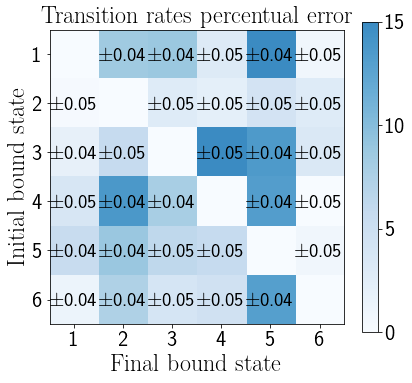

In [15]:
# Plot square grid with errors
fig, ax = plt.subplots(figsize=(6,6))
myColorMap = truncate_colormap(cmap='Blues', minval = 0.0, maxval = 0.65)
im = ax.imshow(100*ratesB2BRelDiff, cmap=myColorMap)
im.set_clim(0.0,15)
# Set labels
ax.set_title(r"$\mathrm{Transition \ rates \ percentual \ error}$", fontsize = fsize + 2)
ax.set_ylabel(r"$\mathrm{Initial \ bound \ state}$", fontsize = fsize + 2)
ax.set_xlabel(r'$\mathrm{Final \ bound \ state}$', fontsize = fsize + 2)
# We want to show all ticks...
ax.set_xticks(np.arange(len(boundStates)))
ax.set_yticks(np.arange(len(boundStates)))
# ... and label them with the respective list entries
ax.set_xticklabels(boundStates)
ax.set_yticklabels(boundStates)
# Loop over data dimensions and create text annotations.
for i in range(len(boundStates)):
    for j in range(len(boundStates)):
        if i != j:
            #text = ax.text(j, i, '{:.2f}'.format(MFPTdiffRel[i, j]), ha="center", 
            #               va="center", color="w", fontsize =fsize)
            text = ax.text(j, i, r'$\pm${:}'.format(round(ratesDiffRelStd[i, j],2)), ha="center", 
                           va="center", color="k", fontsize =fsize-2)
# Set colorbar
cbar = fig.colorbar(im, ax=ax, shrink = 0.8, norm = mpl.colors.Normalize(vmin=0.,vmax=0.15))
cbar.set_ticks([0,5,10, 15])
cbar.set_ticklabels([0,5,10, 15])
# Show plot
fig.tight_layout()
#plt.show()
#plt.savefig('patchyProtein_rates_relError.pdf', bbox_inches='tight')

In [16]:
np.mean(ratesB2BRelDiff)

0.05143796913699672